In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic_toy.csv')

In [8]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [10]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [12]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [18]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [24]:
print('Original Age variable variance:', X_train['Age'].var())
print('Age variance after 99 wala imputation:', X_train['Age_99'].var())
print('Age variance after -1 wala imputation:', X_train['Age_minus1'].var())

print('Original Fare variable variance:', X_train['Fare'].var())
print('Fare variance after 999 wala imputaion:', X_train['Fare_999'].var())
print('Fare variance after -1 wala imputation:', X_train['Fare_minus1'].var())

Original Age variable variance: 210.2517072477438
Age variance after 99 wala imputation: 932.9665366701436
Age variance after -1 wala imputation: 315.99550362600644
Original Fare variable variance: 2761.031434948639
Fare variance after 999 wala imputaion: 47525.47059536007
Fare variance after -1 wala imputation: 2675.2394049177087


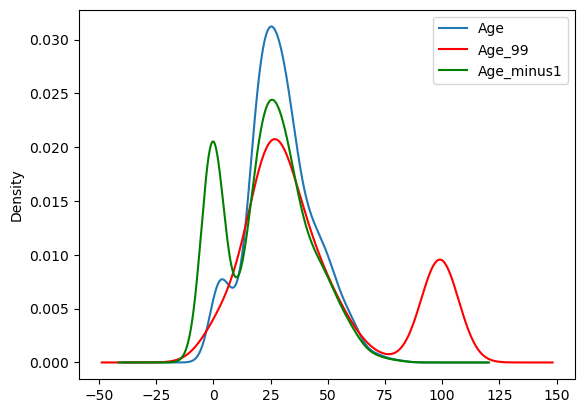

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legend 
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Using Sklearn

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [37]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [39]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [41]:
trf.fit(X_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [43]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.